In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [77]:
# Reading Dataset
df=pd.read_csv('covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [78]:
df.shape

(49068, 10)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [80]:
df.rename(columns={'Province/State': 'State',
                   'Country/Region':'Country'}, inplace=True)
df.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [81]:
df.Date.value_counts()

Date
2020-01-22    261
2020-05-30    261
2020-05-21    261
2020-05-22    261
2020-05-23    261
             ... 
2020-03-26    261
2020-03-27    261
2020-03-28    261
2020-03-29    261
2020-07-27    261
Name: count, Length: 188, dtype: int64

In [82]:
# maximum date
df['Date'].max()

'2020-07-27'

In [83]:
top=df[df['Date']== '2020-07-27']

In [84]:
top

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [85]:
# grouping all rows based on country
top.groupby(by='Country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [86]:
confirmed=df.groupby(by='Date')['Confirmed'].sum().reset_index()
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


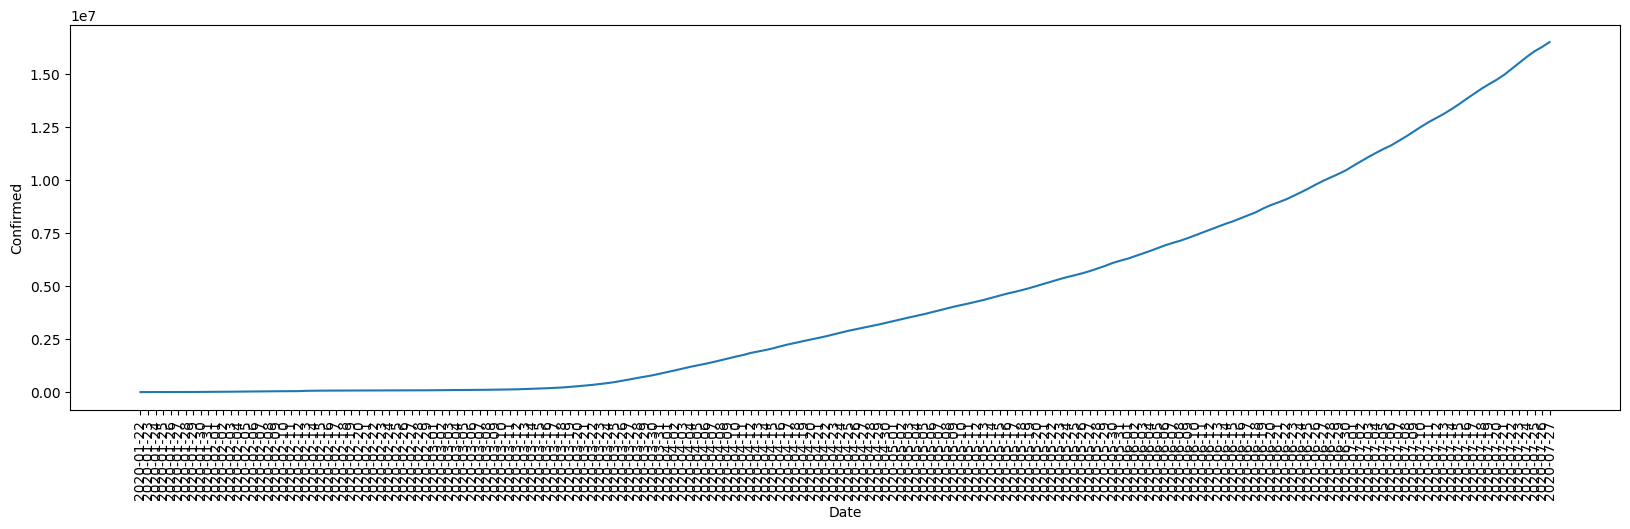

In [87]:
# visualizing confirmed cases
plt.figure(figsize=(20,5))
sns.lineplot(data=confirmed,x='Date', y='Confirmed')
plt.xticks(rotation=90)
plt.show()

Top 10 countries with the most recovered cases

In [88]:
top_10_recovered=df.groupby(by='Country')['Recovered'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_recovered

,Country,Recovered
0,US,56353416
1,Brazil,54492873
2,Russia,25120448
3,India,23783720
4,Germany,17107839
5,Italy,15673910
6,Iran,15200895
7,Spain,15093583
8,Turkey,13345389
9,Chile,13292593


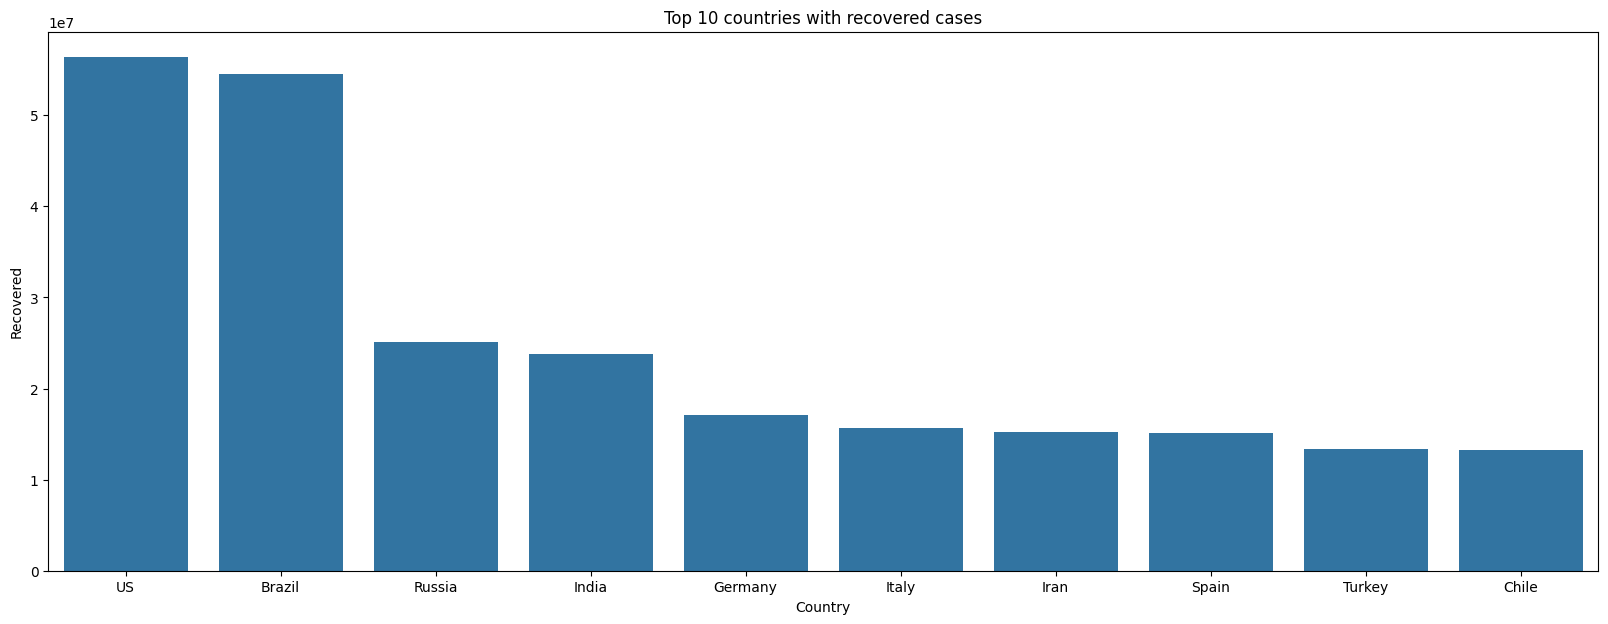

In [89]:
#Visualizing recovered case
plt.figure(figsize=(20,7))
sns.barplot(data=top_10_recovered, x='Country',y='Recovered')
plt.title('Top 10 countries with recovered cases')
plt.show()

Top 10 countries with deaths

In [90]:
top_10_deaths=df.groupby(by='Country')['Deaths'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_deaths

,Country,Deaths
0,US,11011411
1,United Kingdom,3997775
2,Brazil,3938034
3,Italy,3707717
4,France,3048524
5,Spain,3033030
6,Mexico,1728277
7,India,1111831
8,Iran,1024136
9,Belgium,963679


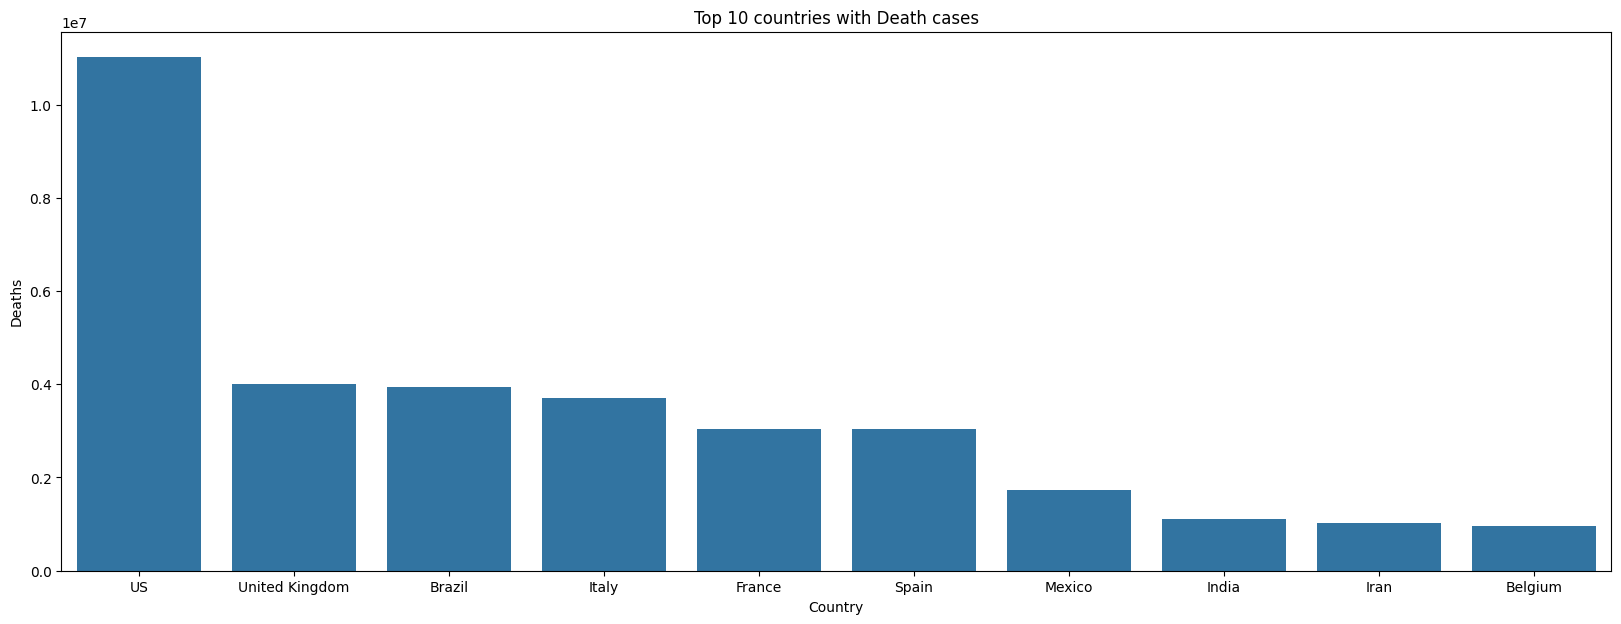

In [91]:
# visualizing death case
plt.figure(figsize=(20,7))
sns.barplot(data=top_10_deaths, x='Country',y='Deaths')
plt.title('Top 10 countries with Death cases')
plt.show()

Top 10 countries with most active cases

In [92]:
top_10_active=df.groupby(by='Country')['Active'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_active

,Country,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


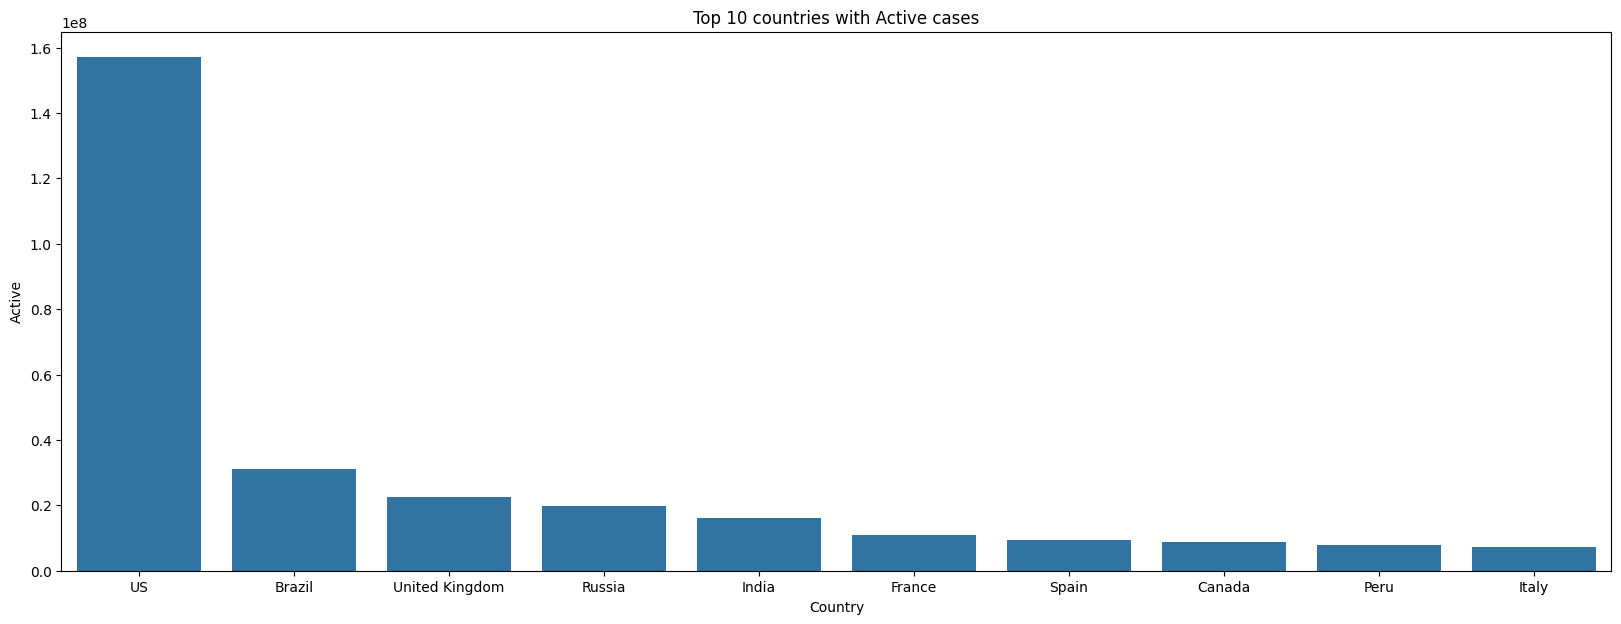

In [93]:
#Visualizing active cases
# visualizing death case
plt.figure(figsize=(20,7))
sns.barplot(data=top_10_active, x='Country',y='Active')
plt.title('Top 10 countries with Active cases')
plt.show()

Country based analysis

In [94]:
# creating US dataset which have country as US
US=df[df['Country']=='US']
US

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas
...,...,...,...,...,...,...,...,...,...,...
47986,NaN,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas
48247,NaN,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas
48508,NaN,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091,Americas
48769,NaN,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125,Americas


In [95]:
US=US.groupby(by='Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
US

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
183,2020-07-23,4038816,144430,1233269,2661117
184,2020-07-24,4112531,145560,1261624,2705347
185,2020-07-25,4178970,146465,1279414,2753091
186,2020-07-26,4233923,146935,1297863,2789125


In [96]:
# creating China dataset which have country as china
China=df[df['Country']=='China']
China

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
48883,Tianjin,China,39.3054,117.3230,2020-07-27,204,3,195,6,Western Pacific
48884,Tibet,China,31.6927,88.0924,2020-07-27,1,0,1,0,Western Pacific
48885,Xinjiang,China,41.1129,85.2401,2020-07-27,311,3,73,235,Western Pacific
48886,Yunnan,China,24.9740,101.4870,2020-07-27,190,2,186,2,Western Pacific


In [97]:
China=China.groupby(by='Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
China

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,548,17,28,503
1,2020-01-23,643,18,30,595
2,2020-01-24,920,26,36,858
3,2020-01-25,1406,42,39,1325
4,2020-01-26,2075,56,49,1970
...,...,...,...,...,...
183,2020-07-23,86045,4649,78701,2695
184,2020-07-24,86202,4650,78745,2807
185,2020-07-25,86381,4652,78813,2916
186,2020-07-26,86570,4652,78862,3056


In [98]:
# creating India dataset which have country as India
India=df[df['Country']=='India']
India

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia
...,...,...,...,...,...,...,...,...,...,...
47892,NaN,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia
48153,NaN,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia
48414,NaN,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia
48675,NaN,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia


In [99]:
India=India.groupby(by='Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
India

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,30601,817209,440298
184,2020-07-24,1337024,31358,849432,456234
185,2020-07-25,1385635,32060,885573,468002
186,2020-07-26,1435616,32771,917568,485277


Compare these countries on the bases of recovered cases


Text(0, 0.5, 'No of  Recovered')

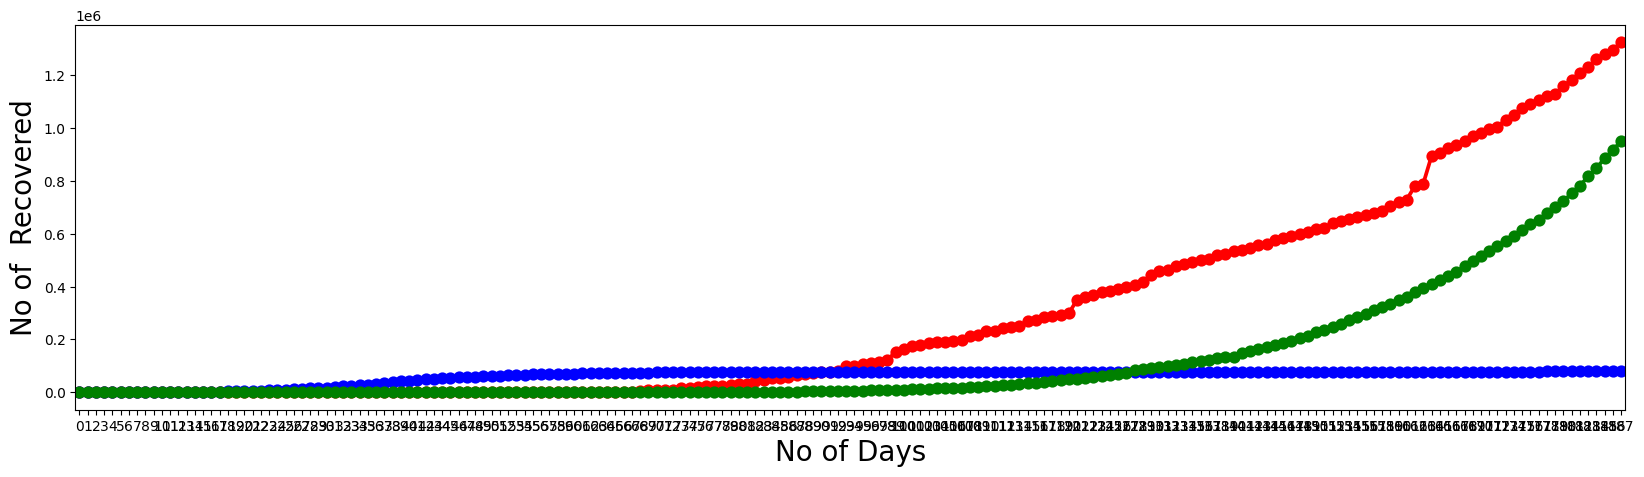

In [100]:
#Visualizing using point plot
plt.figure(figsize=(20,5))

sns.pointplot(x=US.index, y=US.Recovered,color='Red')
sns.pointplot(x=China.index, y=China.Recovered,color='Blue')
sns.pointplot(x=India.index, y=India.Recovered,color='Green')

plt.xlabel('No of Days', fontsize=20)
plt.ylabel('No of  Recovered', fontsize=20)

Compare these countries on the bases of Death cases

Text(0, 0.5, 'No of  Deaths')

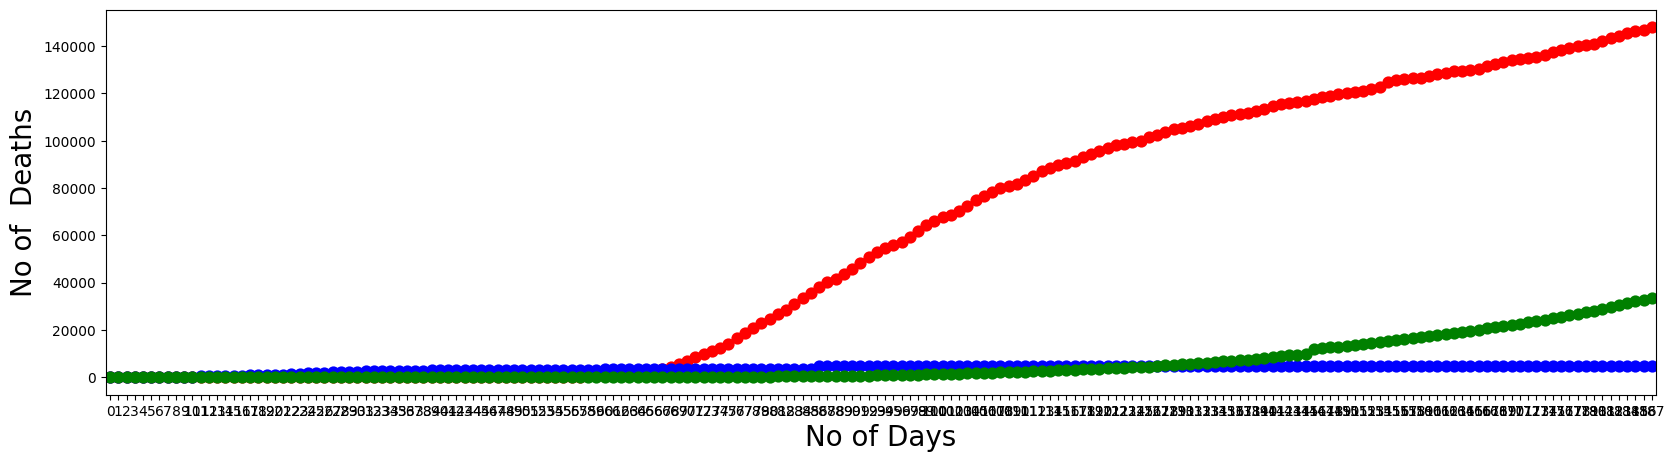

In [101]:
#Visualizing using point plot
plt.figure(figsize=(20,5))

sns.pointplot(x=US.index, y=US.Deaths,color='Red')
sns.pointplot(x=China.index, y=China.Deaths,color='Blue')
sns.pointplot(x=India.index, y=India.Deaths,color='Green')

plt.xlabel('No of Days', fontsize=20)
plt.ylabel('No of  Deaths', fontsize=20)

Compare these countries on the basis of Active cases

Text(0, 0.5, 'No of Active cases')

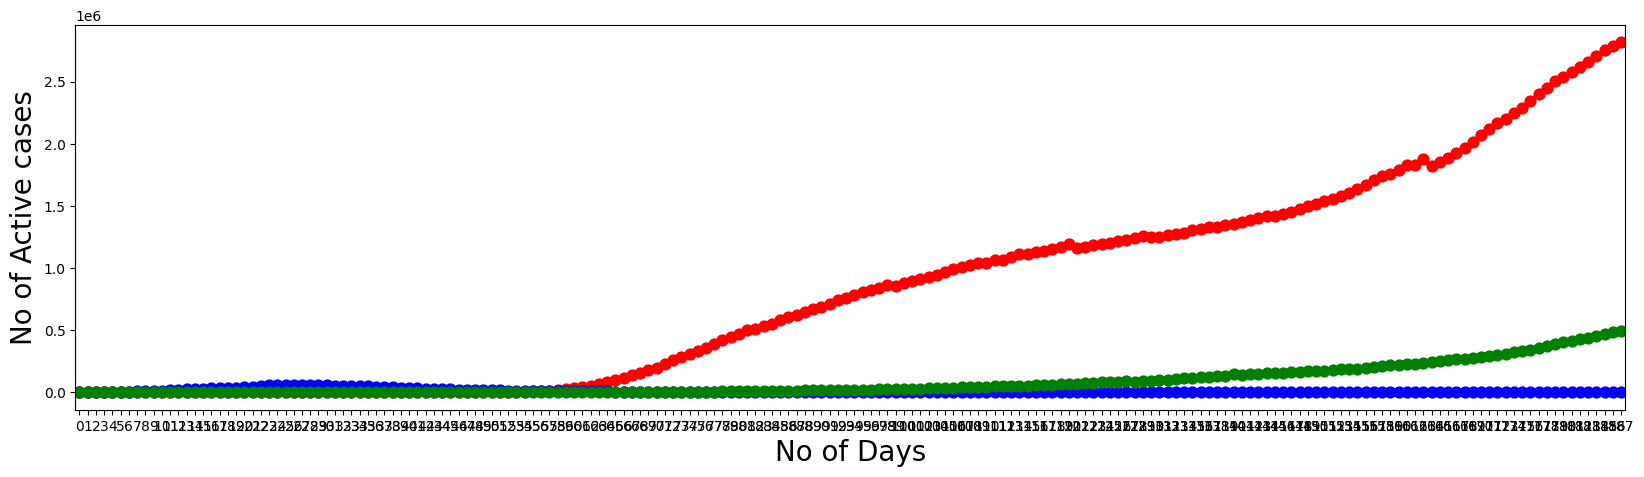

In [102]:
#Visualizing using point plot
plt.figure(figsize=(20,5))

sns.pointplot(x=US.index, y=US.Active,color='Red')
sns.pointplot(x=China.index, y=China.Active,color='Blue')
sns.pointplot(x=India.index, y=India.Active,color='Green')

plt.xlabel('No of Days', fontsize=20)
plt.ylabel('No of Active cases', fontsize=20)

Model Building

In [103]:
# Reading dataset
df1=pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])
df1.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [105]:
# creating new dataset of confirmed cases
confirmed=df1.groupby(by='Date').sum()['Confirmed'].reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [106]:
# creating new dataset of deaths cases
deaths=df1.groupby(by='Date').sum()['Deaths'].reset_index()
deaths.head()

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [107]:
# creating new dataset of recovered cases
recovered=df1.groupby(by='Date').sum()['Recovered'].reset_index()
recovered.head()

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [108]:
# creating new dataset of active cases
active=df1.groupby(by='Date').sum()['Active'].reset_index()
active.head()

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010


Forecasting of confirmed cases

In [109]:
#renaming confirmed columns to ds and y
confirmed.columns=['ds','y']
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [110]:
# importing prophet library
from prophet import Prophet
m=Prophet()

In [111]:
m.fit(confirmed)

20:14:14 - cmdstanpy - INFO - Chain [1] start processing
20:14:15 - cmdstanpy - INFO - Chain [1] done processing


In [112]:
# making prediction for next 7 dates
future=m.make_future_dataframe(periods=7)
forecast=m.predict(future)
forecast.tail(7)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
188,2020-07-28,1.634079e+07,1.621439e+07,1.643385e+07,1.634079e+07,1.634079e+07,-16782.130444,-16782.130444,-16782.130444,-16782.130444,-16782.130444,-16782.130444,0.0,0.0,0.0,1.632401e+07
189,2020-07-29,1.654504e+07,1.643048e+07,1.663113e+07,1.654283e+07,1.654584e+07,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,0.0,0.0,0.0,1.653405e+07
190,2020-07-30,1.674928e+07,1.664544e+07,1.685317e+07,1.674280e+07,1.675343e+07,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,0.0,0.0,0.0,1.674820e+07
191,2020-07-31,1.695352e+07,1.686240e+07,1.706505e+07,1.694016e+07,1.696302e+07,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,0.0,0.0,0.0,1.696362e+07
192,2020-08-01,1.715776e+07,1.706923e+07,1.727226e+07,1.713602e+07,1.717368e+07,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,0.0,0.0,0.0,1.717143e+07
193,2020-08-02,1.736200e+07,1.726559e+07,1.747884e+07,1.732949e+07,1.738432e+07,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,0.0,0.0,0.0,1.736922e+07
194,2020-08-03,1.756624e+07,1.744410e+07,1.767073e+07,1.752637e+07,1.759975e+07,-2144.375427,-2144.375427,-2144.375427,-2144.375427,-2144.375427,-2144.375427,0.0,0.0,0.0,1.756410e+07


In [113]:
new_f=forecast[['ds','yhat','yhat_upper','yhat_lower']]

new_df=pd.DataFrame(new_f)
print(new_df)


'''
ds:
This column contains the dates for which the predictions have been made. It stands for "date stamp".

yhat:
This is the predicted value (forecast) for the given date in the ds column. It represents the model's best estimate for that point in time.

yhat_upper:
This column represents the upper bound of the predicted value, which indicates the higher end of the confidence interval.
It suggests that the actual value is unlikely to exceed this amount, giving the idea of the prediction's uncertainity.

yhat_lower:
This column represents the lower bound of the predicted value, indicating the lower end of the confidence interval. 
It suggests that the actual value is unlikely to get lower by this amount, giving the idea of the prediction's uncertainity.




'''



            ds          yhat    yhat_upper    yhat_lower
0   2020-01-22 -2.034240e+04  8.100665e+04 -1.284696e+05
1   2020-01-23 -7.746625e+03  9.589630e+04 -1.159697e+05
2   2020-01-24  6.123967e+03  1.116861e+05 -9.001631e+04
3   2020-01-25  1.237938e+04  1.173369e+05 -9.163164e+04
4   2020-01-26  8.615766e+03  1.119375e+05 -9.308926e+04
..         ...           ...           ...           ...
190 2020-07-30  1.674820e+07  1.685317e+07  1.664544e+07
191 2020-07-31  1.696362e+07  1.706505e+07  1.686240e+07
192 2020-08-01  1.717143e+07  1.727226e+07  1.706923e+07
193 2020-08-02  1.736922e+07  1.747884e+07  1.726559e+07
194 2020-08-03  1.756410e+07  1.767073e+07  1.744410e+07

[195 rows x 4 columns]


'\nds:\nThis column contains the dates for which the predictions have been made. It stands for "date stamp".\n\nyhat:\nThis is the predicted value (forecast) for the given date in the ds column. It represents the model\'s best estimate for that point in time.\n\nyhat_upper:\nThis column represents the upper bound of the predicted value, which indicates the higher end of the confidence interval.\nIt suggests that the actual value is unlikely to exceed this amount, giving the idea of the prediction\'s uncertainity.\n\nyhat_lower:\nThis column represents the lower bound of the predicted value, indicating the lower end of the confidence interval. \nIt suggests that the actual value is unlikely to get lower by this amount, giving the idea of the prediction\'s uncertainity.\n\n\n\n\n'

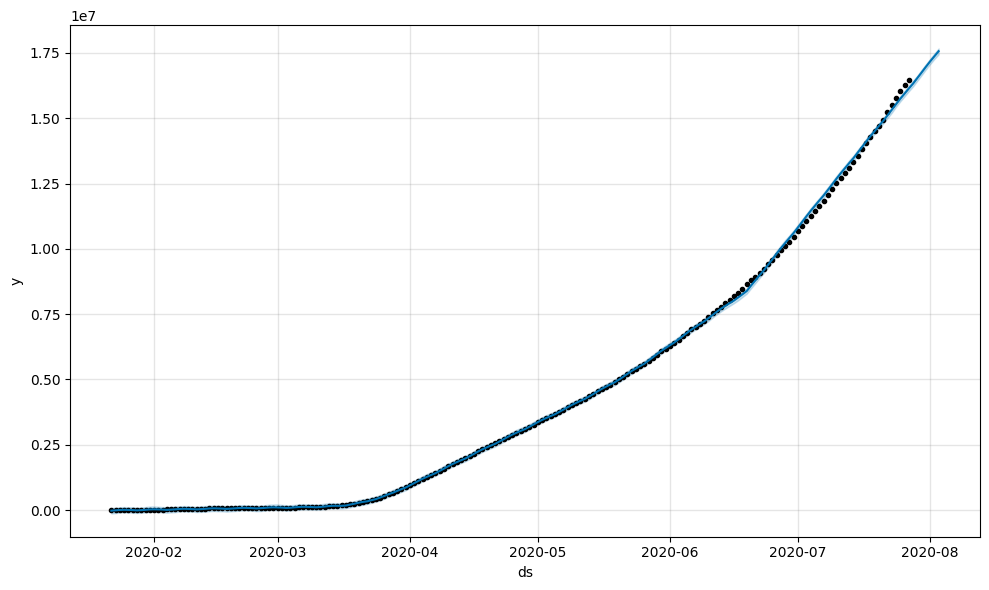

In [114]:
#visualizing
m.plot(new_df)
plt.show()

In [118]:
# Importing plotly library
import plotly
import plotly.express as px


In [119]:
world=df1.groupby(by='Country/Region')[['Confirmed','Active','Deaths','Recovered']].sum().reset_index()
world

,Country/Region,Confirmed,Active,Deaths,Recovered
0,Afghanistan,1936390,1089052,49098,798240
1,Albania,196702,72117,5708,118877
2,Algeria,1179755,345886,77972,755897
3,Andorra,94404,19907,5423,69074
4,Angola,22662,15011,1078,6573
...,...,...,...,...,...
182,West Bank and Gaza,233461,170967,1370,61124
183,Western Sahara,901,190,63,648
184,Yemen,67180,25694,17707,23779
185,Zambia,129421,43167,2643,83611


In [125]:
!pip install nbformat --upgrade

  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled nbformat-5.9.2


In [128]:
#  visualizing
figure=px.choropleth(world,locations='Country/Region',
                     locationmode='country names',
                     color='Active',
                     hover_name='Country/Region', range_color=[1,20000],
                     color_continuous_scale='reds',
                     title='Countries with Active cases')

figure.show

<bound method BaseFigure.show of Figure({
    'data': [{'coloraxis': 'coloraxis',
              'geo': 'geo',
              'hovertemplate': ('<b>%{hovertext}</b><br><br>Cou' ... '<br>Active=%{z}<extra></extra>'),
              'hovertext': array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
                                  'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
                                  'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
                                  'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
                                  'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
                                  'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia',
                                  'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
                                  'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)',
       

In [129]:
import plotly.io as pio
pio.renderers.default = "browser"
figure.show()